# How Much of the World Has Access to the Internet?

## 📖 Background
You work for a policy consulting firm. One of the firm's principals is preparing to give a presentation on the state of internet access in the world. She needs your help answering some questions about internet accessibility across the world.

## 💾 The data

#### The research team compiled the following tables ([source](https://ourworldindata.org/internet)):

#### internet
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1990 to 2019.
- "Internet_usage" -  The share of the entity's population who have used the internet in the last three months.

#### people
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1990 to 2020.
- "Users" - The number of people who have used the internet in the last three months for that country, region, or group.

#### broadband
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1998 to 2020.
- "Broadband_Subscriptions" - The number of fixed subscriptions to high-speed internet at downstream speeds >= 256 kbit/s for that country, region, or group.

_**Acknowledgments**: Max Roser, Hannah Ritchie, and Esteban Ortiz-Ospina (2015) - "Internet." OurWorldInData.org._

## 💪 Challenge
Create a report to answer the principal's questions. Include:

1. What are the top 5 countries with the highest internet use (by population share)?
2. How many people had internet access in those countries in 2019?
3. What are the top 5 countries with the highest internet use for each of the following regions: 'Africa Eastern and Southern', 'Africa Western and Central', 'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia', 'North America', 'European Union'?
4. Create a visualization for those five regions' internet usage over time.
5. What are the 5 countries with the most internet users?
6. What is the correlation between internet usage (population share) and broadband subscriptions for 2019?
7. Summarize your findings.

## Import Packages
In the following code, I'm going to import some packages that I will need in this project. including data exploration and analysis (pandas, numpy) and data visualization (seaborn, matplotlib, plotly)!

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from IPython import display

### Q1: What are the top 5 countries with the highest internet use (by population share)?

To know which five countries have the highest internet use, I...

1. Create a filter to select data from only countries (those whose "Code" != null)
2. Group by "Entity" and "Code," and sum up the "Internet_Usage" for each country
3. Turn the data into a data frame and reset the index so it is better for users to visualize the result
4. Sort the data by "Internet_Usage" in a decending order, because we want the highest five internet usage countries
5. Select only the top 5 results

In [55]:
internet = pd.read_csv('internet.csv')

#1+2
internet_groupby_country = internet[internet['Code'].isna() == False].groupby(['Entity','Code'])['Internet_Usage'].sum()

#3
internet_groupby_country_df = internet_groupby_country.to_frame().reset_index()

#4
internet_groupby_country_df_sort = internet_groupby_country_df.sort_values('Internet_Usage', ascending = False)

#5
highset_internet_usage = internet_groupby_country_df_sort.head(5)
highset_internet_usage

,Entity,Code,Internet_Usage
144,Norway,NOR,1855.540181
87,Iceland,ISL,1806.512910
52,Denmark,DNK,1753.807290
135,Netherlands,NLD,1735.916862
184,Sweden,SWE,1718.799370


Based on the result, we know that the highest five internet usage countries (by population share) are: Norway, Iceland, Denmark, Netherlands, and Sweden!

For our clients to better understand the result, I created a bar chart using Plotly to visualize the internet usage for these five countries. When hovering over each bar, the country name and the exact number of internet usage will be shown.

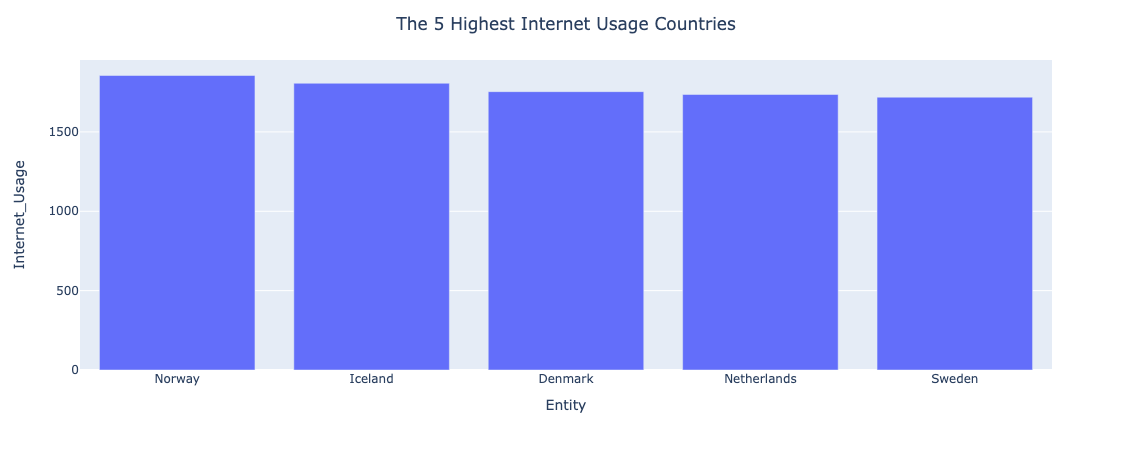

In [72]:
#highset_internet_usage

fig = px.bar(highset_internet_usage,
             x='Entity',
             y='Internet_Usage'
            )
fig.update_layout(
            title=
    		{
                'text' : 'The 5 Highest Internet Usage Countries',
                'x':0.5,
                'xanchor': 'center'
       		})
# fig.show()
display.Image("./internet_usage_Q1.png")

### Q2:How many people had internet access in those countries in 2019?

To know how many people had internet access in those countries in 2019, I...

1. Create a np array (five_country), including "Code" for only those five countries in the last question
2. Use five_country as a filter to exclude every "Entity" that is not in the five_country array from the table "people"
3. Since we only want data from 2019, so I create the second filter to only select data from 2019
4. After filtering all the data I want, I sort the information by "Users" in an ascending order

In [57]:
#1
five_country = np.array(highset_internet_usage['Code'])
five_country

array(['NOR', 'ISL', 'DNK', 'NLD', 'SWE'], dtype=object)

In [58]:
people = pd.read_csv('people.csv')

#2+3+4
five_country_2019 = people[(people['Code'].isin(five_country)) & (people['Year'] == 2019)].sort_values('Users')
five_country_2019

,Entity,Code,Year,Users
2667,Iceland,ISL,2019,357179
4355,Norway,NOR,2019,5241320
1565,Denmark,DNK,2019,5682653
5515,Sweden,SWE,2019,9702513
4085,Netherlands,NLD,2019,16197940


According to the result from Q2, we knew the number of users (people with internet access) in those five countries in 2019. Among these five countries, Iceland has the minor users, and the Netherlands has the most users. As we did in Q1, we also need to visualize the result for our clients.

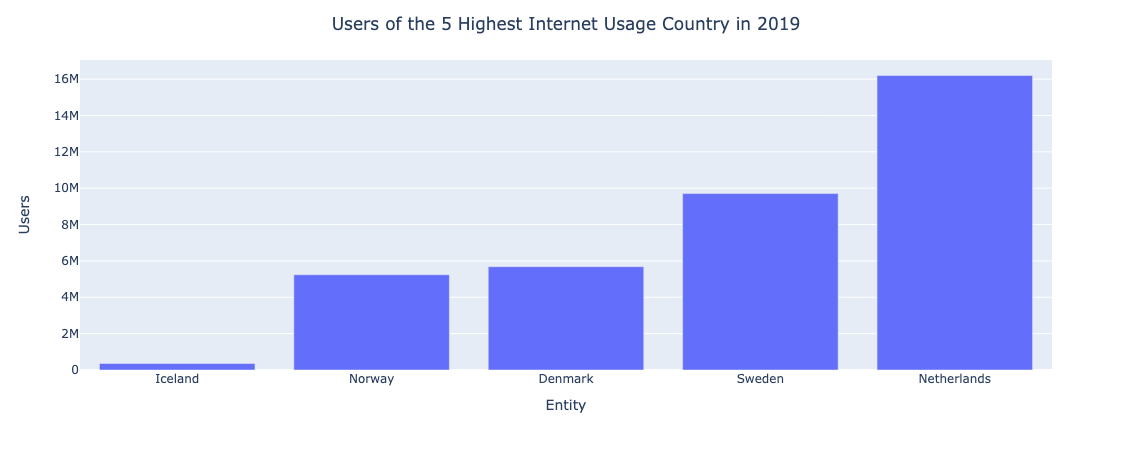

In [59]:
fig = px.bar(five_country_2019,
             x='Entity',
             y='Users')
fig.update_layout(
            title=
    		{
                'text' : 'Users of the 5 Highest Internet Usage Country in 2019',
                'x':0.5,
                'xanchor': 'center'
       		})
# fig.show()

display.Image("./internet_usage_Q2.png")

### Q3:What are the top 5 countries with the highest internet use for each of the following regions: 'Africa Eastern and Southern', 'Africa Western and Central', 'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia', 'North America', 'European Union'?

I think there are some problems in this question. If we do not have a "Region_Code" for each country; plus, regions and countries all stay in the same column "Entity", how can we know that which region is a particular country belongs to?

### Q4:Create a visualization for those five regions' internet usage over time.

For question 4, I'm not really sure which 5 regions' internet usage are we going to analyze, since there are 7 regions mentioned in the last question. Thus, in this question, I chose to analyze the internet usage for the following 7 regions: (1)Africa Eastern and Southern, (2)Africa Western and Central, (3)Latin America & Caribbean, (4)East Asia & Pacific, (5)South Asia, (6)North America, (7)European Union.

The following steps are what I did to visualize the result:
1. Create a np array called "regions", and include all 7 regions we want in this array
2. Use "regions" as a filter to only select data where "Entity" is in the array "regions"
3. The last part is the visualization part, we have the internet usage for each region from 1990-2019. Set "Year" as X-axis and "Internet_Usage" as Y-axis, then group by "Entity". The visualization will sum up the internet usage of 7 regions for each year. A color represents a region, when users hover over the bar, "Year", "Internet_Usage", and "Entity" will be shown.

In [60]:
#1
regions = np.array(['Africa Eastern and Southern','Africa Western and Central','Latin America & Caribbean','East Asia & Pacific','South Asia','North America','European Union'])
regions

array(['Africa Eastern and Southern', 'Africa Western and Central',
       'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia',
       'North America', 'European Union'], dtype='<U27')

In [61]:
#2
region_internet_usage = internet[internet['Entity'].isin(regions)]
region_internet_usage

,Entity,Code,Year,Internet_Usage
22,Africa Eastern and Southern,NaN,1990,0.000000
23,Africa Eastern and Southern,NaN,1991,0.001599
24,Africa Eastern and Southern,NaN,1992,0.004664
25,Africa Eastern and Southern,NaN,1993,0.013609
26,Africa Eastern and Southern,NaN,1994,0.029658
...,...,...,...,...
5985,South Asia,NaN,2013,13.760619
5986,South Asia,NaN,2014,19.059302
5987,South Asia,NaN,2015,16.223473
5988,South Asia,NaN,2016,20.424139


In [62]:
#3

### Visualize the result

In [63]:
# This is a chart, switch to the DataCamp editor to view and configure it.

### Q5:What are the 5 countries with the most internet users?

In order to find 5 countries with the most internet users, I...
1. Except for Entity "World", all entities which are not a country will nit have a "Code", so I got data from countries by selecting those whose "Code" is not "null".
2. Sum up the number of "Users" and group by "Entity"
3. Convert the data into a data frame and reset the index so it is better for users to visualize the result
4. Sort the information by "Users" in an descending order
5. As mentioned before, "World" is the only Entity that is not a country but have a "Code", so we need to drop that row, so all the left result are countries
6. Select the top 5 results

In [64]:
#1 Exclude all the data for Region 
users_country = people[people['Code'].isnull() == False]
users_country

,Entity,Code,Year,Users
0,Afghanistan,AFG,1990,0
1,Afghanistan,AFG,1991,0
2,Afghanistan,AFG,1992,0
3,Afghanistan,AFG,1993,0
4,Afghanistan,AFG,1994,0
...,...,...,...,...
6374,Zimbabwe,ZWE,2016,3341464
6375,Zimbabwe,ZWE,2017,3599269
6376,Zimbabwe,ZWE,2018,3763048
6377,Zimbabwe,ZWE,2019,3854006


In [65]:
#2
users_groupby_country = users_country.groupby('Entity')['Users'].sum()

#3
users_groupby_country_df = users_groupby_country.to_frame().reset_index()

#4
users_groupby_country_df_sort = users_groupby_country_df.sort_values('Users', ascending = False)

#5
users_groupby_country_df_sort.drop(users_groupby_country_df_sort.index[(users_groupby_country_df_sort["Entity"] == "World")],axis=0,inplace=True)

#6
users_groupby_country_df_sort = users_groupby_country_df_sort.iloc[0:5, :]
users_groupby_country_df_sort

,Entity,Users
40,China,9269901489
202,United States,5070162389
88,India,2942444199
96,Japan,2041996793
26,Brazil,1735974590


### Visualize the result

In [66]:
# This is a chart, switch to the DataCamp editor to view and configure it.

### Q6:What is the correlation between internet usage (population share) and broadband subscriptions for 2019?

To answer this question, I...
1. Select the data from internet table for year 2019 -->internet_2019
2. Select the data from broadband table for year 2019 -->broadband_2019
3. Merge these 2 tables together on "Code"

In [67]:
#1
internet_2019 = internet[internet['Year'] == 2019]
internet_2019

,Entity,Code,Year,Internet_Usage
104,Albania,ALB,2019,69.642855
385,Austria,AUT,2019,87.752205
470,Bahrain,BHR,2019,99.701504
551,Belarus,BLR,2019,82.789152
581,Belgium,BEL,2019,90.370513
...,...,...,...,...
6580,Turkey,TUR,2019,73.976704
6716,United Arab Emirates,ARE,2019,99.149998
6746,United Kingdom,GBR,2019,92.516629
6861,Uruguay,URY,2019,76.949552


In [68]:
#2
broadband = pd.read_csv("broadband.csv")
broadband_2019 = broadband[broadband['Year'] == 2019]
broadband_2019

,Entity,Code,Year,Broadband_Subscriptions
14,Afghanistan,AFG,2019,0.051741
29,Albania,ALB,2019,15.140735
47,Algeria,DZA,2019,8.321684
66,Andorra,AND,2019,47.131264
81,Angola,AGO,2019,0.374130
...,...,...,...,...
3809,Vietnam,VNM,2019,15.345280
3829,World,OWID_WRL,2019,14.892984
3845,Yemen,YEM,2019,1.309927
3866,Zambia,ZMB,2019,0.497681


In [69]:
#3
internet_2019_broadband_2019 = internet_2019.merge(broadband_2019,
                                                   on = 'Code')
internet_2019_broadband_2019

,Entity_x,Code,Year_x,Internet_Usage,Entity_y,Year_y,Broadband_Subscriptions
0,Albania,ALB,2019,69.642855,Albania,2019,15.140735
1,Austria,AUT,2019,87.752205,Austria,2019,28.128099
2,Bahrain,BHR,2019,99.701504,Bahrain,2019,8.590934
3,Belarus,BLR,2019,82.789152,Belarus,2019,34.011101
4,Belgium,BEL,2019,90.370513,Belgium,2019,39.783138
...,...,...,...,...,...,...,...
148,Turkey,TUR,2019,73.976704,Turkey,2019,17.058664
149,United Arab Emirates,ARE,2019,99.149998,United Arab Emirates,2019,31.174944
150,United Kingdom,GBR,2019,92.516629,United Kingdom,2019,39.792530
151,Uruguay,URY,2019,76.949552,Uruguay,2019,29.245749


### Visualize the result by creating a scatter plot

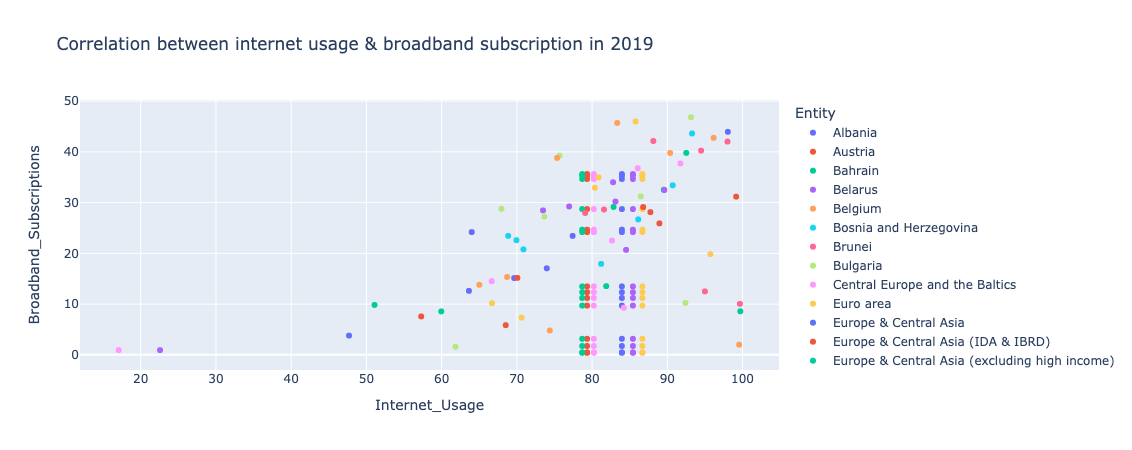

In [70]:
fig = px.scatter(internet_2019_broadband_2019,
                 x = 'Internet_Usage',
                 y = 'Broadband_Subscriptions',
                 color="Entity_x",
                 labels={
                     "Internet_Usage": "Internet_Usage",
                     "Broadband_Subscriptions": "Broadband_Subscriptions",
                     "Entity_x": "Entity"
                 },
                title="Correlation between internet usage & broadband subscription in 2019")

# fig.show()

display.Image("./internet_usage_Q6.png")